# The arXiv NLP Project - Part 1

## Packages

In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Paths & Config

In [2]:
DATA_SET = "./data/arXiv-1000-sample.json"
OUTPUT_FILE = "./data/clean-arXiv-1000-sample.json"

In [3]:
sns.set()

## 1. Get Data

In [4]:
arxiv = pd.read_json(DATA_SET, orient="records")
arxiv.head(10)

,id,authors,title,doi,category,abstract
0,2101.01590,"Matyas Barczy, Gyula Pap",Mixing convergence of LSE for supercritical Ga...,None,"[math.ST, math.PR, stat.TH]",We prove mixing convergence of least squares...
1,2106.05427,Sibo Cheng and Didier Lucor and Jean-Philippe ...,Observation data compression for variational a...,None,"[math.NA, cs.NA]",Accurate estimation of error covariances (bo...
2,2107.06669,"Yong Chen, Young Joo Lee, Yile Zhao",Complex symmetry of Toeplitz operators,None,"[math.FA, math.CV]",We introduce a new class of conjugations and...
3,1810.05664,Khaled Bahlali and Ludovic Tangpi,BSDEs driven by $|z|^2/y$ and applications to ...,None,"[math.PR, math.AP]",Existence and uniqueness is established for ...
4,2102.00196,Karn Watcharasupat and Anh H. T. Nguyen and Ch...,Directional Sparse Filtering using Weighted Le...,10.1109/ICASSP39728.2021.9414336,"[eess.AS, cs.LG, cs.SD, eess.SP]",In blind source separation of speech signals...
5,2109.13300,"Sophie Crisp, Alexander Ody, Pietro Musumeci, ...",Resonant phase matching by oblique illuminatio...,None,[physics.acc-ph],In dielectric laser-driven accelerators (DLA...
6,2101.11067,"Sufian Abedrabbo (1 and 2), Bashar Lahlouh (2)...",Optical polarizability of erbium-oxygen comple...,10.1088/1361-6463/abd5e4,"[physics.optics, cond-mat.mtrl-sci]","For erbium-doped amorphous oxides, such as t..."
7,2108.03230,Kemal Bidzhiev and Maurizio Fagotti and Lenart...,Macroscopic effects of localised measurements ...,None,"[cond-mat.stat-mech, cond-mat.str-el]",A quantum jammed state can be seen as a stat...
8,2106.01217,"Bo Peng, Hongxing Fan, Wei Wang, Jing Dong, Yu...",DFGC 2021: A DeepFake Game Competition,10.1109/IJCB52358.2021.9484387,[cs.CV],This paper presents a summary of the DFGC 20...
9,2101.01529,Ishai Dan-Cohen and David Jarossay,"$M_{0,5}$: Towards the Chabauty-Kim method in ...",None,"[math.AG, math.NT]","If Z is an open subscheme of Spec ZZ, X is a..."


## 2. Explore Data

In [5]:
n_samples = len(arxiv)
print("Total samples: ", n_samples)

Total samples:  1000


**Repeat artcicle with multiple categories**

In [6]:
data_tmp = []
for article in arxiv.to_dict(orient="records"):
    for category in article["category"]:
        a = article.copy()
        a["category"] = category.split(".")[0]
        data_tmp.append(a)
        
arxiv = pd.DataFrame(data_tmp)
arxiv.drop_duplicates(inplace=True)
arxiv.head(10)

,id,authors,title,doi,category,abstract
0,2101.01590,"Matyas Barczy, Gyula Pap",Mixing convergence of LSE for supercritical Ga...,None,math,We prove mixing convergence of least squares...
2,2101.01590,"Matyas Barczy, Gyula Pap",Mixing convergence of LSE for supercritical Ga...,None,stat,We prove mixing convergence of least squares...
3,2106.05427,Sibo Cheng and Didier Lucor and Jean-Philippe ...,Observation data compression for variational a...,None,math,Accurate estimation of error covariances (bo...
4,2106.05427,Sibo Cheng and Didier Lucor and Jean-Philippe ...,Observation data compression for variational a...,None,cs,Accurate estimation of error covariances (bo...
5,2107.06669,"Yong Chen, Young Joo Lee, Yile Zhao",Complex symmetry of Toeplitz operators,None,math,We introduce a new class of conjugations and...
7,1810.05664,Khaled Bahlali and Ludovic Tangpi,BSDEs driven by $|z|^2/y$ and applications to ...,None,math,Existence and uniqueness is established for ...
9,2102.00196,Karn Watcharasupat and Anh H. T. Nguyen and Ch...,Directional Sparse Filtering using Weighted Le...,10.1109/ICASSP39728.2021.9414336,eess,In blind source separation of speech signals...
10,2102.00196,Karn Watcharasupat and Anh H. T. Nguyen and Ch...,Directional Sparse Filtering using Weighted Le...,10.1109/ICASSP39728.2021.9414336,cs,In blind source separation of speech signals...
13,2109.13300,"Sophie Crisp, Alexander Ody, Pietro Musumeci, ...",Resonant phase matching by oblique illuminatio...,None,physics,In dielectric laser-driven accelerators (DLA...
14,2101.11067,"Sufian Abedrabbo (1 and 2), Bashar Lahlouh (2)...",Optical polarizability of erbium-oxygen comple...,10.1088/1361-6463/abd5e4,physics,"For erbium-doped amorphous oxides, such as t..."


In [7]:
n_samples = len(arxiv)
print("Total samples: ", n_samples)

Total samples:  1437


In [8]:
arxiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1889
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1437 non-null   float64
 1   authors   1437 non-null   object 
 2   title     1437 non-null   object 
 3   doi       360 non-null    object 
 4   category  1437 non-null   object 
 5   abstract  1437 non-null   object 
dtypes: float64(1), object(5)
memory usage: 78.6+ KB


**Remove `doi` column**

In [9]:
arxiv.drop(["doi"], axis=1, inplace=True)
arxiv.head(10)

,id,authors,title,category,abstract
0,2101.01590,"Matyas Barczy, Gyula Pap",Mixing convergence of LSE for supercritical Ga...,math,We prove mixing convergence of least squares...
2,2101.01590,"Matyas Barczy, Gyula Pap",Mixing convergence of LSE for supercritical Ga...,stat,We prove mixing convergence of least squares...
3,2106.05427,Sibo Cheng and Didier Lucor and Jean-Philippe ...,Observation data compression for variational a...,math,Accurate estimation of error covariances (bo...
4,2106.05427,Sibo Cheng and Didier Lucor and Jean-Philippe ...,Observation data compression for variational a...,cs,Accurate estimation of error covariances (bo...
5,2107.06669,"Yong Chen, Young Joo Lee, Yile Zhao",Complex symmetry of Toeplitz operators,math,We introduce a new class of conjugations and...
7,1810.05664,Khaled Bahlali and Ludovic Tangpi,BSDEs driven by $|z|^2/y$ and applications to ...,math,Existence and uniqueness is established for ...
9,2102.00196,Karn Watcharasupat and Anh H. T. Nguyen and Ch...,Directional Sparse Filtering using Weighted Le...,eess,In blind source separation of speech signals...
10,2102.00196,Karn Watcharasupat and Anh H. T. Nguyen and Ch...,Directional Sparse Filtering using Weighted Le...,cs,In blind source separation of speech signals...
13,2109.13300,"Sophie Crisp, Alexander Ody, Pietro Musumeci, ...",Resonant phase matching by oblique illuminatio...,physics,In dielectric laser-driven accelerators (DLA...
14,2101.11067,"Sufian Abedrabbo (1 and 2), Bashar Lahlouh (2)...",Optical polarizability of erbium-oxygen comple...,physics,"For erbium-doped amorphous oxides, such as t..."


**Distribution per category**

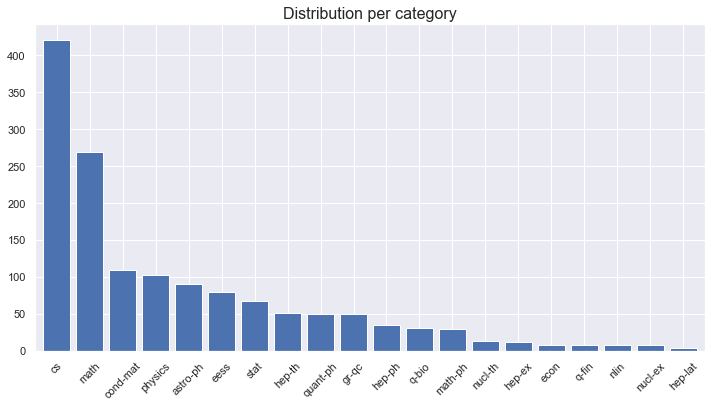

In [10]:
plt.figure(figsize=(12, 6))
arxiv["category"].value_counts().plot(kind="bar", width=.8)
plt.xticks(rotation=45)
plt.title("Distribution per category", fontdict={"fontsize": 16})
plt.show()

In [11]:
count = lambda x: len(x.split())
arxiv["title_length"] = arxiv["title"].apply(count)
arxiv["abstract_length"] = arxiv["abstract"].apply(count)
arxiv.head(10)

,id,authors,title,category,abstract,title_length,abstract_length
0,2101.01590,"Matyas Barczy, Gyula Pap",Mixing convergence of LSE for supercritical Ga...,math,We prove mixing convergence of least squares...,12,58
2,2101.01590,"Matyas Barczy, Gyula Pap",Mixing convergence of LSE for supercritical Ga...,stat,We prove mixing convergence of least squares...,12,58
3,2106.05427,Sibo Cheng and Didier Lucor and Jean-Philippe ...,Observation data compression for variational a...,math,Accurate estimation of error covariances (bo...,9,181
4,2106.05427,Sibo Cheng and Didier Lucor and Jean-Philippe ...,Observation data compression for variational a...,cs,Accurate estimation of error covariances (bo...,9,181
5,2107.06669,"Yong Chen, Young Joo Lee, Yile Zhao",Complex symmetry of Toeplitz operators,math,We introduce a new class of conjugations and...,5,63
7,1810.05664,Khaled Bahlali and Ludovic Tangpi,BSDEs driven by $|z|^2/y$ and applications to ...,math,Existence and uniqueness is established for ...,11,158
9,2102.00196,Karn Watcharasupat and Anh H. T. Nguyen and Ch...,Directional Sparse Filtering using Weighted Le...,eess,In blind source separation of speech signals...,14,74
10,2102.00196,Karn Watcharasupat and Anh H. T. Nguyen and Ch...,Directional Sparse Filtering using Weighted Le...,cs,In blind source separation of speech signals...,14,74
13,2109.13300,"Sophie Crisp, Alexander Ody, Pietro Musumeci, ...",Resonant phase matching by oblique illuminatio...,physics,In dielectric laser-driven accelerators (DLA...,11,161
14,2101.11067,"Sufian Abedrabbo (1 and 2), Bashar Lahlouh (2)...",Optical polarizability of erbium-oxygen comple...,physics,"For erbium-doped amorphous oxides, such as t...",9,201


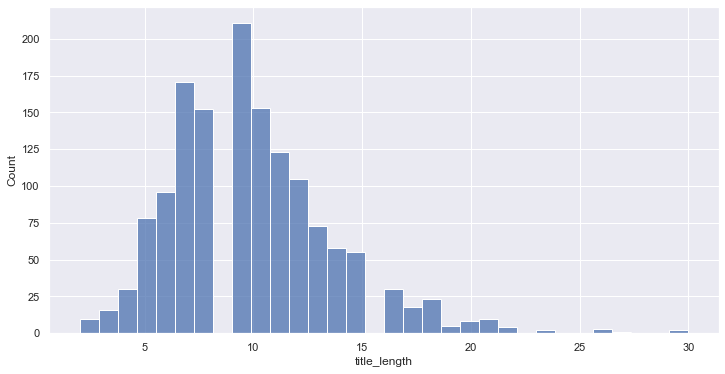

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(x=arxiv['title_length'])
plt.show()

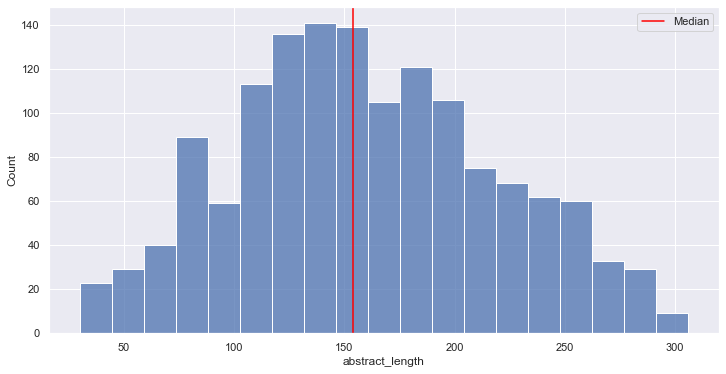

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(x=arxiv['abstract_length'])
plt.axvline(x=arxiv['abstract_length'].median(), color="red", label="Median")
plt.legend(loc="best")
plt.show()

## 3. Save data

In [14]:
arxiv.to_json(OUTPUT_FILE, orient="records")